# Predictive Modeling Example: Model fit

In this notebook, we will fit a model to the data we have prepared in the previous notebook. We will use the sci-kit learn library to fit a linear regression model to the data.

1. Import libraries and modules
2. Load data
3. Explore data
4. Fit model
5. Evaluate model
6. Save model

## Step 1: Import the libraries we will use in this notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

np.random.seed(1) # set this to ensure the results are repeatable. 

## Step 2: Load the given data that we will model

In [2]:
df = pd.read_csv('model4_dataset.csv')

df.head(3)

,input,target
0,16.243454,8803.949866
1,-6.117564,-657.602516
2,-5.281718,-210.705031


For educational purposes, let's look at the first five values in X and y (note how X is an array of lists)

## Step 3: Explore the given data

Often we will do much more than this, but at least look at things using a scatterplot

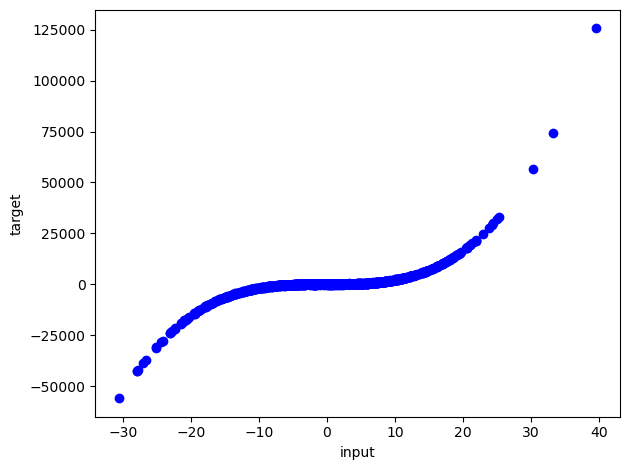

In [3]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(df['input'], df['target'], color='blue')

ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

## Step 4a: Fit the model using a 1st order polynomial (linear regression)

Let's imagine that you're very new at this and you did not recognize that the relationship between x and y is clearly not a linear (1st order polynomial) relationship. 

In [4]:
lin_reg=LinearRegression()

lin_reg = LinearRegression().fit(df[['input']],df['target'])

## Step 4a: Fit the model using a 2nd order polynomial 

Let's image (and hopefully this is you) that you recognized that the relationship between x and y is clearly not a linear (1st order polynomial) relationship. And, if you have sufficient experience with common function 'shapes', you recognize that this relationship looks like a second order polynomial.

To fit this as a polynomial model, we must engineer a new feature (this is an example of a much broader topic of feature engineering). This new feature is the square of the original feature. Let's store all of this into a new dataframe called new_df.

In [5]:
new_df = pd.DataFrame()
new_df['x1'] = df['input']
new_df['x2'] = df['input']**2  # here we have engineered a new feature
new_df['y'] = df['target']

new_df.head(3)

,x1,x2,y
0,16.243454,263.849786,8803.949866
1,-6.117564,37.424591,-657.602516
2,-5.281718,27.896540,-210.705031


In [6]:
X = new_df[['x1', 'x2']]
y = new_df['y']

print(X.shape)
print(y.shape)


(1000, 2)
(1000,)


In [7]:
lin_reg=LinearRegression()

lin_reg = LinearRegression().fit(new_df[['x1', 'x2']],new_df[['y']]) # note: the double square brackets are important! 

# see pandas_dataframe_demo.ipynb for more details on how to work with pandas dataframes

## Step 5: Analyze the linear regression model's performance

Visualize the linear regression model results

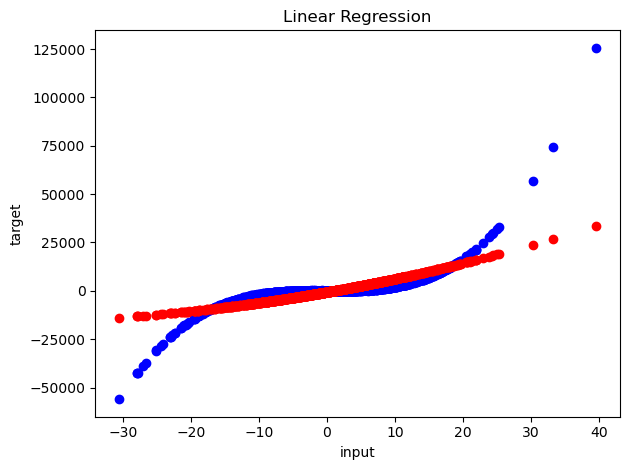

In [8]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(df['input'], df['target'], color='blue')
ax.scatter(df['input'], lin_reg.predict(X), color='red')

ax.set_title('Linear Regression')
ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

In [9]:
b0 = lin_reg.intercept_[0]
b1 = lin_reg.coef_[0][0]
b2 = lin_reg.coef_[0][1]

r2 = lin_reg.score(X, y)

... using fstring formatting, we can display these values as follows...

In [10]:
print(f"y = {b0:.2f} + {b1:.2f}x + + {b2:.2f}x^2")
print(f"R^2: {lin_reg.score(X, y):.3f}") 
# for more on fstrings see here...
# https://www.freecodecamp.org/news/python-f-strings-tutorial-how-to-use-f-strings-for-string-formatting/

y = -645.62 + 620.40x + + 6.21x^2
R^2: 0.565


## Now fitting the model with 3rd order polynomial

In [11]:
new_df2 = pd.DataFrame()
new_df2['x1'] = df['input']
new_df2['x2'] = df['input']**2 
new_df2['x3'] = df['input']**3                               # here we have engineered a new feature
new_df2['y'] = df['target']

new_df2.head(3)

,x1,x2,x3,y
0,16.243454,263.849786,4285.831767,8803.949866
1,-6.117564,37.424591,-228.947336,-657.602516
2,-5.281718,27.896540,-147.341644,-210.705031


In [12]:
X = new_df2[['x1', 'x2','x3']]
y = new_df2['y']

print(X.shape)
print(y.shape)

(1000, 3)
(1000,)


In [13]:
lin_reg2=LinearRegression()

lin_reg2 = LinearRegression().fit(new_df2[['x1', 'x2', 'x3']],new_df2[['y']]) # note: the double square brackets are important! 

# see pandas_dataframe_demo.ipynb for more details on how to work with pandas dataframes

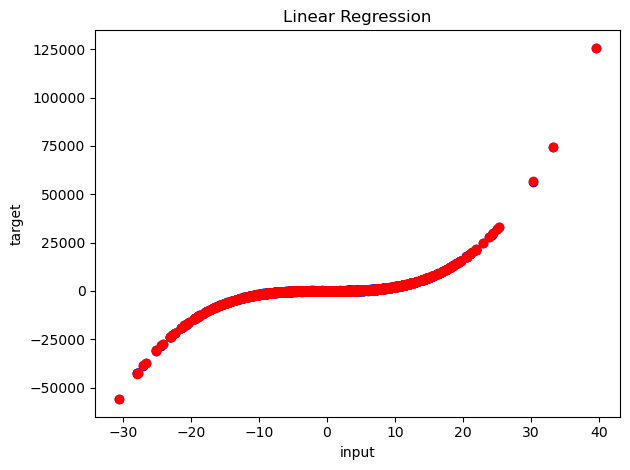

In [14]:

fig2 = plt.figure()
ax2 = fig2.add_subplot()

ax2.scatter(df['input'], df['target'], color='blue')
ax2.scatter(df['input'], lin_reg2.predict(X), color='red')

ax2.set_title('Linear Regression')
ax2.set_xlabel('input')
ax2.set_ylabel('target')
plt.tight_layout()
plt.show()

In [15]:
b0 = lin_reg2.intercept_[0]
b1 = lin_reg2.coef_[0][0]
b2 = lin_reg2.coef_[0][1]
b3 = lin_reg2.coef_[0][2]

r2 = lin_reg2.score(X, y)

In [16]:

print(f"y = {b0:.2f} + {b1:.2f}x + + {b2:.2f}x^2 + {b3:.2f}x^3")
print(f"R^2: {lin_reg2.score(X, y):.3f}") 
# for more on fstrings see here...
# https://www.freecodecamp.org/news/python-f-strings-tutorial-how-to-use-f-strings-for-string-formatting/

y = -0.83 + -1.05x + + 1.04x^2 + 2.00x^3
R^2: 1.000


## Now fitting the Model with SDGGradientDescent